In [147]:
#Lets suppress the warning and import the packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import plot_roc_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb



In [3]:
df = pd.read_csv(r'C:\Users\soura\Desktop\Upgrad\Telecom Churn\telecom.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


# Data Handling



In [149]:
#Lets check the datatypes

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [150]:
#Lets check the basic statistics of the data

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [151]:
#Lets check the missing values

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display((df.isnull().sum()/len(df))*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## Handling Categorical Columns

In [152]:
#Lets extract the categorical columns and reduce the number of categories with count less than 10% in each case

cat_columns = df.columns[(df.columns.str.startswith('monthly_')) | (df.columns.str.startswith('sachet_')) ]
for i in cat_columns:
    t = df[i].value_counts(normalize=True).reset_index()
    list1 = t['index'][t[i]<0.1]
    d={}
    for k in list1:
        d[k]='Others'
        df[i] = df[i].replace(d)

In [153]:
#Lets create the dummies and add them to the main dataframe

dummie = pd.get_dummies(df[cat_columns],drop_first=True)
df = pd.concat([df,dummie],axis=1).drop(cat_columns,axis=1)
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,monthly_2g_9_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,sachet_2g_9_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,monthly_3g_9_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,sachet_3g_9_Others
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,66.39,56.13,0

In [154]:
#Lets check the date columns apart from the dummies added

df.select_dtypes(exclude=['int64','float64']).isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
monthly_2g_6_Others             0
monthly_2g_7_Others             0
monthly_2g_8_Others             0
monthly_2g_9_Others             0
sachet_2g_6_Others              0
sachet_2g_7_Others              0
sachet_2g_8_Others              0
sachet_2g_9_Others              0
monthly_3g_6_Others             0
monthly_3g_7_Others             0
monthly_3g_8_Others             0
monthly_3g_9_Others             0
sachet_3g_6_Others              0
sachet_3g_7_Others              0
sachet_3g_8_Others              0
sachet_3g_9_Others              0
dtype: int64

In [155]:
#Filling the last dates of months as the mode value

df['last_date_of_month_6'] = df['last_date_of_month_6'].fillna\
                             (df['last_date_of_month_6'].mode()[0])
df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna\
                             (df['last_date_of_month_7'].mode()[0])
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna\
                             (df['last_date_of_month_8'].mode()[0])

#Creating a new variable days which is the number of days before the end of that month , the person did the last recharge

df['days_before_last_rec_6'] = pd.to_datetime(df['last_date_of_month_6']).dt.day\
                               -pd.to_datetime(df['date_of_last_rech_6']).dt.day

df['days_before_last_rec_7'] = pd.to_datetime(df['last_date_of_month_7']).dt.day\
                               -pd.to_datetime(df['date_of_last_rech_7']).dt.day

df['days_before_last_rec_8'] = pd.to_datetime(df['last_date_of_month_8']).dt.day\
                               -pd.to_datetime(df['date_of_last_rech_8']).dt.day

#Dropping the date columns

df = df.drop(['last_date_of_month_6',
              'last_date_of_month_7',
              'last_date_of_month_8',
              'date_of_last_rech_6',
              'date_of_last_rech_7',
              'date_of_last_rech_8'],
               axis = 1)

#Dropping unnecessary and highly imbalanced columns
df = df.drop(['mobile_number','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis = 1)

# Filtering High Valued Customers

In [156]:
df['Average_rech_first_2_month'] = (df['total_rech_amt_6'] + 
                                    df['total_rech_amt_7'])/2

quantile_ = df['Average_rech_first_2_month'].quantile(0.7)
df = df[df['Average_rech_first_2_month'] >= quantile_]
df

,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,monthly_2g_9_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,sachet_2g_9_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,monthly_3g_9_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,sachet_3g_9_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month
7,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,5.0,1185.0
8,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,...,0.00,19.83,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5.0,0.0,1.0,519.0
13,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,...,NaN,0.00,NaN,NaN,NaN,0.20,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,9.0,1.0,380.0
16,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.00,0.00,0.00,315.91,215.64,205.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,17.0,459.0
17,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,6.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,9/30/2014,261.269,410.614,290.851,330.963,5.01,142.59,97.61,206.19,329.58,500.14,355.48,196.51,5.06,0.00,0.00,0.00,46.04,0.00,0.00,0.00,5.01,131.71,76.83,148.56,7.83,32.31,59.84,48.71,0.16,0.00,1.21,0.00,0.00,7.00,20.85,0.00,13.01,164.03,137.89,...,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1022,0.00,0.00,0.00,0.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0.0,2.0,8.0,392.0
99974,9/30/2014,414.303,321.093,371.016,306.689,17.56,0.00,1.30,2.46,428.41,366.78,360.58,364.34,0.00,0.00,0.00,0.00,0.00,0.00,

In [157]:
#Creating 3 new variables where the total recharge amount of that month is the product of average data amount recharge and total number of data recharges for the month

df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_6'] = df['total_rech_data_amt_6'].fillna(0)

df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_7'] = df['total_rech_data_amt_7'].fillna(0)

df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_8'] = df['total_rech_data_amt_8'].fillna(0)

In [158]:
#Further dropping the columns with high imbalanced data

df = df.drop(['fb_user_6','fb_user_7',
              'fb_user_8',
              'night_pck_user_6','night_pck_user_7',
              'night_pck_user_8',
              'max_rech_data_6','max_rech_data_7',
              'max_rech_data_8',
              'date_of_last_rech_data_6','date_of_last_rech_data_7',
              'date_of_last_rech_data_8'],
               axis = 1)

df = df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
              'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
              'arpu_3g_6','arpu_3g_7','arpu_3g_8',
              'arpu_2g_6','arpu_2g_7','arpu_2g_8',
              'total_rech_amt_6','total_rech_amt_7'],
              axis = 1)
df.head()

,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,monthly_2g_9_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,sachet_2g_9_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,monthly_3g_9_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,sachet_3g_9_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
7,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,5.0,1185.0,0.0,0.0,0.0
8,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,...,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,NaN,NaN,NaN,NaN,315,21.03,910.65,122.16,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5.0,0.0,1.0,519.0,0.0,354.0,207.0
13,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,...,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,2607,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,9.0,1.0,380.0,0.0,0.0,207.0
16,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,17.0,459.0,0.0,0.0,0.0
17,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,97.54,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,6.0,408.0,0.0,0.0,0.0


In [159]:
#Creating a new variable for average data recharge for 3 months

df['av_rech_data_amt_3_months'] = (df['total_rech_data_amt_6'] + df['total_rech_data_amt_7'] + df['total_rech_data_amt_8'])/3
df = df.drop(['total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8'],axis=1)
df

,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,monthly_2g_9_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,sachet_2g_9_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,monthly_3g_9_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,sachet_3g_9_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,av_rech_data_amt_3_months
7,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,5.0,1185.0,0.000000
8,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,...,NaN,NaN,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,NaN,NaN,NaN,NaN,315,21.03,910.65,122.16,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5.0,0.0,1.0,519.0,187.000000
13,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,...,NaN,NaN,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,2607,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,9.0,1.0,380.0,69.000000
16,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.00,0.00,0.00,315.91,215.64,205.93,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,17.0,459.0,0.000000
17,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,6.0,408.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,9/30/2014,261.269,410.614,290.851,330.963,5.01,142.59,97.61,206.19,329.58,500.14,355.48,196.51,5.06,0.00,0.00,0.00,46.04,0.00,0.00,0.00,5.01,131.71,76.83,148.56,7.83,32.31,59.84,48.71,0.16,0.00,1.21,0.00,0.00,7.00,20.85,0.00,13.01,164.03,137.89,...,0.0,23.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1022,0.00,0.00,0.00,0.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0.0,2.0,8.0,392.0,199.333333
99974,9/30/2014,414.30

# Creating Dependant Variable (y)

In [160]:
#Lets tag the churners by selecting from the below criteria

condition = [(df['total_ic_mou_9'] == 0) & (df['total_og_mou_9'] == 0) & (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0)]
values = [1]
df['churn'] = np.select(condition,values)
df['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

We can clearly see its an imbalanced y variable.We will have to treat them further

In [161]:
#Lets remove the 4th month metrics since the customers might have churned by that time.

df = df.drop(df.columns[df.columns.str.endswith('_9')],axis=1)
df = df.drop(['monthly_2g_9_Others','sachet_2g_9_Others','sachet_3g_9_Others','monthly_3g_9_Others','sep_vbc_3g'],axis=1)
df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,av_rech_data_amt_3_months,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,...,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,802,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,5.0,1185.0,0.000000,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,...,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,315,21.03,910.65,122.16,0,1,0,0,1,1,0,0,0,0,0,0,5.0,0.0,1.0,519.0,187.000000,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,...,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,2607,0.00,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0,0,10.0,9.0,1.0,380.0,69.000000,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,...,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.00,0.00,0.00,0.00,0.00,0.00,511,0.00,2.45,21.89,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,17.0,459.0,0.000000,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,19,2,4,30,110,0,30,30,0,0,0.00,0.00,0.00,0.00,0.00,0.00,667,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,6.0,408.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,5.06,0.00,0.00,46.04,0.00,0.00,5.01,131.71,76.83,7.83,32.31,59.84,0.16,0.00,1.21,0.00,7.00,20.85,13.01,164.03,137.89,0.00,10.88,20.78,275.53,460.83,273.56,0.00,0.00,0.00,0.0,...,2.80,2.66,11,19,13,337,90,67,67,30,50,30,0.00,0.00,0.00,0.00,0.00,0.00,1022,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,0,0,0,0.0,2.0,8.0,392.0,199.333333,0
99974,414.303,321.093,371.016,17.56,0.00,1.30,428.

In [162]:
#Lets check the null values again

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display((df.isnull().sum()/len(df))*100)

arpu_6                        0.000000
arpu_7                        0.000000
arpu_8                        0.000000
onnet_mou_6                   1.052947
onnet_mou_7                   1.009630
onnet_mou_8                   3.125521
offnet_mou_6                  1.052947
offnet_mou_7                  1.009630
offnet_mou_8                  3.125521
roam_ic_mou_6                 1.052947
roam_ic_mou_7                 1.009630
roam_ic_mou_8                 3.125521
roam_og_mou_6                 1.052947
roam_og_mou_7                 1.009630
roam_og_mou_8                 3.125521
loc_og_t2t_mou_6              1.052947
loc_og_t2t_mou_7              1.009630
loc_og_t2t_mou_8              3.125521
loc_og_t2m_mou_6              1.052947
loc_og_t2m_mou_7              1.009630
loc_og_t2m_mou_8              3.125521
loc_og_t2f_mou_6              1.052947
loc_og_t2f_mou_7              1.009630
loc_og_t2f_mou_8              3.125521
loc_og_t2c_mou_6              1.052947
loc_og_t2c_mou_7         

## Missing Value Imputation

In [163]:
#Lets scale the whole data set

scaler = StandardScaler()
df_new = pd.DataFrame(scaler.fit_transform(df))

df_new.columns = df.columns
df_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,av_rech_data_amt_3_months,churn
0,1.088501,1.643402,5.356252,-0.522171,-0.523071,-0.474964,0.065909,0.285184,-0.127451,-0.017197,0.258613,0.237183,-0.049461,-0.098284,0.147379,-0.186206,-0.262142,-0.208753,0.500182,1.095414,-0.045292,2.418398,2.113980,2.268565,-0.228751,-0.202268,-0.235440,0.357607,0.655545,-0.037560,-0.455678,-0.415592,-0.398992,-0.374255,-0.418145,-0.322691,0.369589,1.343492,1.248220,0.0,...,0.884666,1.058676,-0.746205,-0.719750,-0.340280,5.025429,8.062871,3.383998,8.210351,-0.731873,-0.745945,4.704367,-0.284238,-0.278858,-0.257772,-0.298313,-0.325002,-0.314057,-0.473793,-0.183623,-0.283682,-0.263319,-0.353222,-0.360697,-0.337753,-0.459560,-0.471640,-0.504255,-0.367973,-0.372105,-0.362465,-0.265631,-0.26419,-0.247253,-0.042345,0.574361,0.178728,0.999103,-0.280789,3.251746
1,-0.471101,-0.209364,-0.807505,0.247743,0.090189,-0.511464,-0.695667,-0.713656,-0.521875,-0.221218,-0.178147,-0.180753,-0.248691,-0.226236,-0.205446,0.846751,0.485085,-0.325545,-0.407769,-0.466504,-0.517468,-0.309723,-0.315956,-0.326872,-0.228751,-0.202268,0.716709,0.241897,0.003119,-0.559444,-0.182814,-0.159340,-0.373547,-0.461454,-0.467550,-0.259798,-0.162293,-0.153168,-0.155473,0.0,...,-0.096355,-0.097578,0.720779,0.945985,0.398240,-0.820255,-0.466021,-0.119317,-0.769798,-0.381646,-0.745945,-0.589663,-0.284238,0.991087,-0.257660,-0.298313,0.552616,-0.300161,-0.973153,-0.277637,1.900709,0.002051,-0.353222,2.772409,-0.337753,-0.459560,2.120263,1.983122,-0.367973,-0.372105,-0.362465,-0.265631,-0.26419,-0.247253,0.428312,-0.798676,-0.607316,-0.363490,-0.114155,-0.307527
2,-0.213316,-0.828414,0.118644,0.438290,-0.411925,0.547205,-0.019255,-0.634308,0.198510,0.074568,1.702958,0.771756,-0.181721,0.132111,-0.192097,-0.193604,-0.363225,-0.226698,-0.127930,-0.563088,0.513257,-0.110372,-0.315956,0.819450,-0.228751,-0.202268,-0.170188,-0.211752,-0.620022,0.228323,0.618933,-0.269737,0.771488,0.120684,-0.369968,-0.067328,-0.162293,-0.153168,-0.155473,0.0,...,0.952478,1.539813,-0.641420,-0.823858,0.081731,0.171750,-0.351539,-0.361684,-0.190433,0.038625,-0.391702,-0.658506,-0.284238,-0.278858,-0.257697,-0.298313,-0.325002,-0.314057,1.377021,-0.331495,-0.331180,-0.311405,-0.353222,-0.360697,-0.337753,-0.459560,-0.471640,1.983122,-0.367973,-0.372105,-0.362465,-0.265631,-0.26419,-0.247253,1.604952,1.260879,-0.607316,-0.647875,-0.219304,-0.307527
3,-0.353070,-0.624914,-0.704850,-0.538030,-0.483070,-0.436109,-0.267659,-0.407535,-0.467155,-0.221218,-0.141240,-0.180753,-0.248691,-0.045944,-0.205446,-0.223112,-0.126589,-0.094860,0.359245,-0.153913,-0.188965,-0.309723,-0.118529,0.173394,-0.228751,-0.202268,-0.235440,0.078638,-0.189478,-0.172560,-0.446952,-0.463776,-0.420128,-0.439052,-0.343650,-0.395770,-0.162293,-0.153168,-0.155473,0.0,...,-0.096355,-0.

In [164]:
#Lets apply the iterative imputer with Linear Regression as the estimator to impute the values obtained

imp = IterativeImputer(estimator=LinearRegression(),n_nearest_features=3,random_state=0,verbose=2,max_iter=50,initial_strategy='median',tol=0.001)
df_new = pd.DataFrame(imp.fit_transform(df_new))

[IterativeImputer] Completing matrix with shape (30011, 134)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.69
[IterativeImputer] Change: 44.39213805050383, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending imputation round 2/50, elapsed time 1.35
[IterativeImputer] Change: 71.3420750599806, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending imputation round 3/50, elapsed time 1.99
[IterativeImputer] Change: 77.04936465927355, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending imputation round 4/50, elapsed time 2.66
[IterativeImputer] Change: 85.23990896255611, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending imputation round 5/50, elapsed time 3.31
[IterativeImputer] Change: 65.7126045324471, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending imputation round 6/50, elapsed time 3.96
[IterativeImputer] Change: 62.441254775411416, scaled tolerance: 0.13429775111653086 
[IterativeImputer] Ending im

In [165]:
#Lets check for null values now

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display((df_new.isnull().sum()/len(df_new))*100)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [166]:
#Lets inverse the scale now

df_new = pd.DataFrame(scaler.inverse_transform(df_new))
df_new.columns = df.columns
df_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,av_rech_data_amt_3_months,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,...,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,3.0,6.000000e+00,5.0,1185.0,0.000000,1.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,...,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,5.0,4.440892e-16,1.0,519.0,187.000000,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,...,16.24,21.44,6.0,4.0,11.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.00,0.00,0.02,0.00,0.00,0.00,2607.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,10.0,9.000000e+00,1.0,380.0,69.000000,0.0
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,...,0.00,0.00,10.0,6.0,2.0,160.0,110.0,110.0,130.0,100.0,100.0,130.0,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,4.440892e-16,17.0,459.0,0.000000,0.0
4,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,19.0,2.0,4.0,30.0,110.0,0.0,30.0,30.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,667.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,1.000000e+00,6.0,408.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30006,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,5.06,0.00,0.00,46.04,0.00,0.00,5.01,131.71

In [167]:
#Lets try fine binning and create information value for the attribute av_rech_data_amt_3_months

#First we create the bins and split them into categories
df_new['av_rech_data_amt_3_months'] = pd.cut(x=df_new['av_rech_data_amt_3_months'], bins=[-1, 100, 400, 800, 1600, 3200 , 6400, 99999], 
                    labels=['0 to 100', '100-400', '400 to 800', 
                            '800 to 1600', '1600 to 3200','3200-6400','6400+'])

#Now we create the dataframe with the total count for each category
a = df_new['av_rech_data_amt_3_months'].value_counts().reset_index()
a = a.rename(columns={'av_rech_data_amt_3_months':'total_number'})

#Now we calculate the good events and bad events for each category (here not_churn and churn)
av_rech_data_amt_3_months_woe = df_new['churn'].groupby(df_new['av_rech_data_amt_3_months']).sum().reset_index().rename(columns={'av_rech_data_amt_3_months':'index'})
av_rech_data_amt_3_months_woe = pd.merge(av_rech_data_amt_3_months_woe,a,on='index',how='left')

#Now we calculate the good and bad event percentage.Next we calculate the WOW which is log(%good events/%bad events)
av_rech_data_amt_3_months_woe['not_churn'] = av_rech_data_amt_3_months_woe['total_number'] - av_rech_data_amt_3_months_woe['churn']
av_rech_data_amt_3_months_woe['% of churn'] = (av_rech_data_amt_3_months_woe['churn']/av_rech_data_amt_3_months_woe['churn'].sum())*100
av_rech_data_amt_3_months_woe['% of not churn'] = (av_rech_data_amt_3_months_woe['not_churn']/av_rech_data_amt_3_months_woe['not_churn'].sum())*100
av_rech_data_amt_3_months_woe['woe'] = np.log(av_rech_data_amt_3_months_woe['% of not churn']/av_rech_data_amt_3_months_woe['% of churn'])

#Now we calculate the information value by multiplying woe with the change of good and bad events
av_rech_data_amt_3_months_woe['av_rech_data_amt_3_months_IV'] = av_rech_data_amt_3_months_woe['woe'] * ((av_rech_data_amt_3_months_woe['% of not churn'] - av_rech_data_amt_3_months_woe['% of churn'])/100)
av_rech_data_amt_3_months_woe = av_rech_data_amt_3_months_woe.rename(columns={'index':'av_rech_data_amt_3_months'})

#Finally we merge the values with the original dataframe and remove the base column
df_new = pd.merge(df_new,av_rech_data_amt_3_months_woe[['av_rech_data_amt_3_months','av_rech_data_amt_3_months_IV']],on='av_rech_data_amt_3_months',how='left')
df_new = df_new.drop(['av_rech_data_amt_3_months'],axis=1)
df_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,sachet_2g_6_Others,sachet_2g_7_Others,sachet_2g_8_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others,sachet_3g_6_Others,sachet_3g_7_Others,sachet_3g_8_Others,days_before_last_rec_6,days_before_last_rec_7,days_before_last_rec_8,Average_rech_first_2_month,churn,av_rech_data_amt_3_months_IV
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,...,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,3.0,6.000000e+00,5.0,1185.0,1.0,0.040476
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,...,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,5.0,4.440892e-16,1.0,519.0,0.0,0.039151
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,...,16.24,21.44,6.0,4.0,11.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.00,0.00,0.02,0.00,0.00,0.00,2607.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,10.0,9.000000e+00,1.0,380.0,0.0,0.040476
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,...,0.00,0.00,10.0,6.0,2.0,160.0,110.0,110.0,130.0,100.0,100.0,130.0,0.00,0.00,0.00,0.00,0.00,0.00,511.0,0.00,2.45,21.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,4.440892e-16,17.0,459.0,0.0,0.040476
4,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,19.0,2.0,4.0,30.0,110.0,0.0,30.0,30.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,667.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,1.000000e+00,6.0,408.0,0.0,0.040476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30006,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,5.06,0.00,0.00,46.04,0.00,0.00,5.01,131.71

#EDA

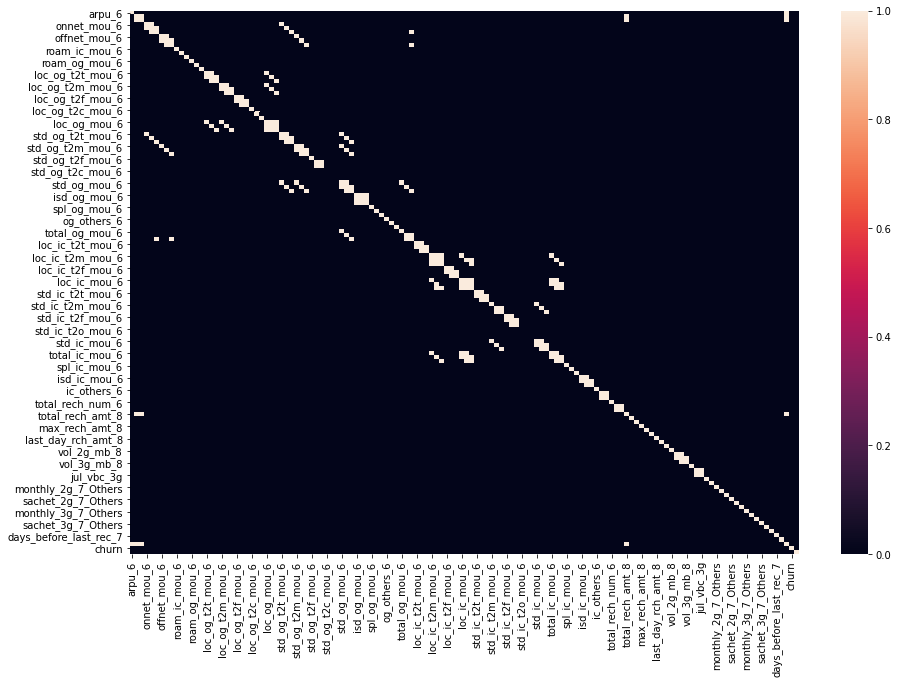

In [168]:
#Lets check the correlation map
plt.figure(figsize=(15,10))
sns.heatmap((df_new.corr()>0.7))
plt.show()

In [169]:
#Lets split into 2 dataframe churn and not churn for detailed insights

churn_df = df_new[df_new['churn']!=0]
not_churn_df = df_new[df_new['churn']==0]

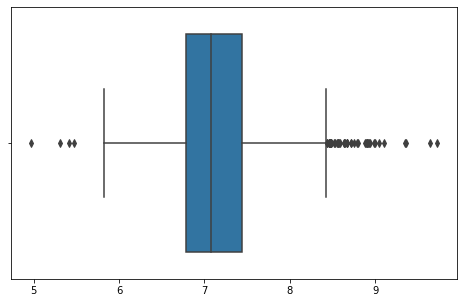

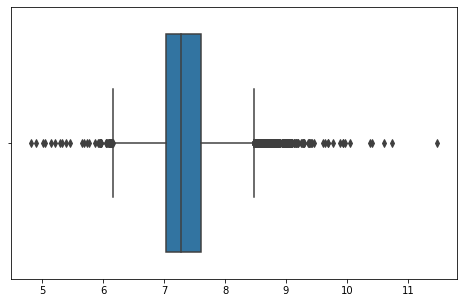

In [170]:
plt.figure(figsize=(8,5))
sns.boxplot(np.log(churn_df['arpu_6']+churn_df['arpu_7']+churn_df['arpu_8']))
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(np.log(not_churn_df['arpu_6']+not_churn_df['arpu_7']+not_churn_df['arpu_8']))
plt.show()

We can see the average revenue for churners lies in range of logarithmic range of 7 to 7.6 while the average revenue for non churners are in range 6.7 to 7.5.
We can also see a lot of non churners have very low average revenue which is less than 6. People with revenue less than 6 are quite critical

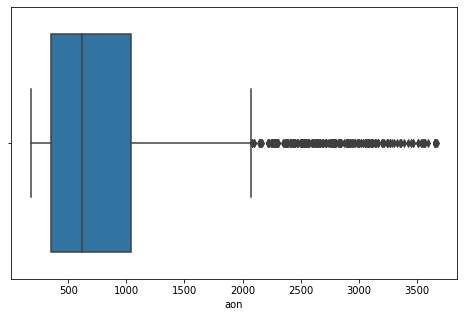

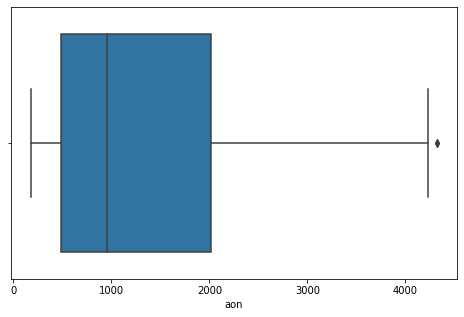

In [171]:
plt.figure(figsize=(8,5))
sns.boxplot(churn_df['aon'])
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(not_churn_df['aon'])
plt.show()

We can see the average network days for non churners are in between 500 days to 2000 days while for churners, it is between 300 to 1000 days. Few churners do days greater than 2000days

In [172]:
df_new[['monthly_2g_6_Others','monthly_2g_7_Others','monthly_2g_8_Others',
        'monthly_3g_6_Others','monthly_3g_7_Others','monthly_3g_8_Others']].groupby(df_new['churn']).sum()

,monthly_2g_6_Others,monthly_2g_7_Others,monthly_2g_8_Others,monthly_3g_6_Others,monthly_3g_7_Others,monthly_3g_8_Others
churn,,,,,,
0.0,3190.0,3339.0,3035.0,3338.0,3456.0,3416.0
1.0,139.0,116.0,38.0,241.0,194.0,69.0


From the data above we can observe the decreasing trend over the 3 months for both 2g and 3g. In case of churners there is an exponential decrease. This is a matter of concern if a person who has a scheme on month 6 or 7 dont opt for it on 8th, most likely they will churn

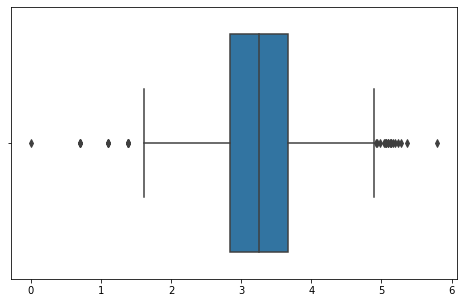

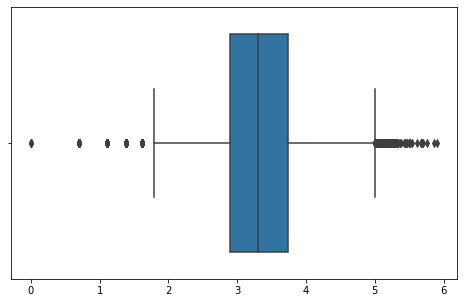

In [173]:
plt.figure(figsize=(8,5))
sns.boxplot(np.log(churn_df['total_rech_num_6']+churn_df['total_rech_num_7']+churn_df['total_rech_num_8']))
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(np.log(not_churn_df['total_rech_num_6']+not_churn_df['total_rech_num_7']+not_churn_df['total_rech_num_8']))
plt.show()

We can see number of recharges seem to be similar for both the case. Thus for now we cant detect how number of recharges determine the churn rate

# Interpretable Model

In [174]:
#Creating a copy for the interpretable model
df_inter = df_new.copy()

#Lets remove the highly correlated variables obtained from the heatmap above

df_inter = df_inter.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
                      'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                      'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
                      'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                      'total_rech_amt_8',
                      'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
                      'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                      'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
                      'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
                      'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                      'total_og_mou_6','total_og_mou_7','total_og_mou_8',
                      'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'],axis=1)

##Train-Test Split

In [175]:
#Splitting the data in X and y and applying train test split
X = df_inter.drop('churn',axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [176]:
#Lets apply robust scaler as we require quartile scaling since the data set has a lot of outliers

scale1 = RobustScaler(quantile_range=(20,80))
X_train_scaled = pd.DataFrame(scale1.fit_transform(X_train.iloc[:,:]))
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scale1.transform(X_test.iloc[:,:]))
X_test_scaled.columns = X_test.columns

##RFE

In [177]:
#lets fit RFE and find the top 30 variables that explain the model the most

logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(X_train_scaled, y_train)

In [178]:
#Lets store the variable names in a list col

col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_7', 'offnet_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'aon',
       'aug_vbc_3g', 'monthly_2g_6_Others', 'monthly_2g_7_Others',
       'monthly_2g_8_Others', 'sachet_2g_8_Others', 'monthly_3g_8_Others',
       'sachet_3g_8_Others', 'days_before_last_rec_7',
       'days_before_last_rec_8'],
      dtype='object')

##Interpretable Logistic Regression

In [179]:
#adding the constant and fitting

X_train_sm = sm.add_constant(X_train_scaled[col])
logreg = sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20976
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4320.4
Date:                Mon, 30 Nov 2020   Deviance:                       8640.7
Time:                        16:42:28   Pearson chi2:                 4.40e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.2341      0.057    -38.876      0.000      -2.347      -2.121
arpu_6                     0.3037      0.042      7.164      0.000       0.221       0.387
arpu_7                     0.4124      0.061      6.810      0.000       0.294       0.531
arpu_8                    -1.0260      0.094    -10.873      0.000      -1.211      -0.841
onnet_mou_7                0.9688      0.075     12.925      0.000       0.822       1.116
offnet_mou_7               1.1764      0.090     13.143      0.000       1.001       1.352
loc_og_t2t_mou_8          -0.6545      0.069     -9.549      0.000      -0.789      -0.520
loc_og_t2m_mou_7          -0.8472      0.069    -12.289      0.000      -0.982      -0.712
std_og_mou_6               0.0618      0.047      1.307      0.191      -0.031       0.154
std_og_mou_7              -1.8646      0.129    -14.505      0.000      -2.117      -1.613
std_og_mou_8               0.3423      0.059      5.778      0.000       0.226       0.458
loc_ic_t2m_mou_8          -0.2993      0.066     -4.507      0.000      -0.429      -0.169
std_ic_mou_6               0.0501      0.014      3.618      0.000       0.023       0.077
std_ic_mou_8              -0.0970      0.026     -3.785      0.000      -0.147      -0.047
spl_ic_mou_7              -0.2857      0.338     -0.846      0.397      -0.947       0.376
spl_ic_mou_8              -1.9575      0.392     -4.999      0.000      -2.725      -1.190
total_rech_num_7           0.2514      0.056      4.454      0.000       0.141       0.362
total_rech_num_8          -0.6870      0.085     -8.072      0.000      -0.854      -0.520
max_rech_amt_7             0.0513      0.032      1.625      0.104      -0.011       0.113
last_day_rch_amt_7        -0.0897      0.032     -2.830      0.005      -0.152      -0.028
last_day_rch_amt_8        -0.6778      0.067    -10.172      0.000      -0.808      -0.547
aon                       -0.6142      0.073     -8.396      0.000      -0.758      -0.471
aug_vbc_3g                -0.0502      0.017     -3.032      0.002      -0.083      -0.018
monthly_2g_6_Others       -0.1579      0.141     -1.121      0.262      -0.434       0.118
monthly_2g_7_Others       -0.2044      0.151     -1.356      0.175      -0.500       0.091
monthly_2g_8_Others       -1.2678      0.223     -5.688      0.000      -1.705      -0.831
sachet_2g_8_Others        -0.4119      0.096     -4.302      0.000      -0.600      -0.224
monthly_3g_8_Others       -1.0544      0.179     -5.887      0.000      -1.405      -0.703
sachet_3g_8_Others        -0.6198      0.216     -2.875      0.004      -1.042      -0.197
days_before_last_rec_7     0.1536      0.037      4.205      0.000       0.082       0.225
days_before_last_rec_8     0.3959      0.034     11.730      0.000       0.330  

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].values, i) for i in range(X_train_scaled[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_7,19.50
4,offnet_mou_7,9.85
3,onnet_mou_7,9.62
1,arpu_7,4.29
2,arpu_8,4.24
9,std_og_mou_8,4.06
16,total_rech_num_8,3.90
6,loc_og_t2m_mou_7,3.60
15,total_rech_num_7,3.50
7,std_og_mou_6,3.43


We observe some high P values as well as VIF values. Lets remove std_og_mou_6 since it has high P value.It may decrease std_og_mou_7s VIF

In [181]:
remove=['std_og_mou_6']
logm2 = sm.GLM(np.array(y_train),X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20977
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4321.2
Date:                Mon, 30 Nov 2020   Deviance:                       8642.4
Time:                        16:42:30   Pearson chi2:                 4.68e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.2290      0.057    -38.936      0.000      -2.341      -2.117
arpu_6                     0.3346      0.035      9.454      0.000       0.265       0.404
arpu_7                     0.4025      0.060      6.685      0.000       0.285       0.521
arpu_8                    -1.0500      0.092    -11.365      0.000      -1.231      -0.869
onnet_mou_7                0.9685      0.075     12.903      0.000       0.821       1.116
offnet_mou_7               1.1755      0.090     13.118      0.000       1.000       1.351
loc_og_t2t_mou_8          -0.6550      0.069     -9.546      0.000      -0.790      -0.521
loc_og_t2m_mou_7          -0.8532      0.069    -12.365      0.000      -0.988      -0.718
std_og_mou_7              -1.8230      0.125    -14.624      0.000      -2.067      -1.579
std_og_mou_8               0.3536      0.058      6.053      0.000       0.239       0.468
loc_ic_t2m_mou_8          -0.3050      0.067     -4.583      0.000      -0.435      -0.175
std_ic_mou_6               0.0515      0.014      3.732      0.000       0.024       0.079
std_ic_mou_8              -0.0984      0.026     -3.829      0.000      -0.149      -0.048
spl_ic_mou_7              -0.3230      0.338     -0.954      0.340      -0.986       0.340
spl_ic_mou_8              -1.9500      0.391     -4.983      0.000      -2.717      -1.183
total_rech_num_7           0.2439      0.056      4.351      0.000       0.134       0.354
total_rech_num_8          -0.6778      0.085     -8.005      0.000      -0.844      -0.512
max_rech_amt_7             0.0525      0.032      1.662      0.096      -0.009       0.114
last_day_rch_amt_7        -0.0904      0.032     -2.853      0.004      -0.152      -0.028
last_day_rch_amt_8        -0.6772      0.067    -10.164      0.000      -0.808      -0.547
aon                       -0.6155      0.073     -8.414      0.000      -0.759      -0.472
aug_vbc_3g                -0.0504      0.017     -3.042      0.002      -0.083      -0.018
monthly_2g_6_Others       -0.1681      0.141     -1.196      0.232      -0.444       0.108
monthly_2g_7_Others       -0.2037      0.151     -1.352      0.176      -0.499       0.092
monthly_2g_8_Others       -1.2663      0.223     -5.681      0.000      -1.703      -0.829
sachet_2g_8_Others        -0.4116      0.096     -4.301      0.000      -0.599      -0.224
monthly_3g_8_Others       -1.0605      0.179     -5.916      0.000      -1.412      -0.709
sachet_3g_8_Others        -0.6286      0.216     -2.911      0.004      -1.052      -0.205
days_before_last_rec_7     0.1522      0.037      4.165      0.000       0.081       0.224
days_before_last_rec_8     0.3938      0.034     11.681      0.000       0.328       0.460
================================================================================

In [182]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].drop(remove,axis=1).values, i) for i in range(X_train_scaled[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,std_og_mou_7,17.53
4,offnet_mou_7,9.82
3,onnet_mou_7,9.60
1,arpu_7,4.22
2,arpu_8,4.08
8,std_og_mou_8,3.99
15,total_rech_num_8,3.89
6,loc_og_t2m_mou_7,3.60
14,total_rech_num_7,3.49
5,loc_og_t2t_mou_8,2.62


Removing monthly_2g_6_others and offnet_mou_7 one by one since they have high P value

In [183]:
remove=['std_og_mou_6','monthly_2g_6_Others']
logm2 = sm.GLM(np.array(y_train),X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20978
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4321.9
Date:                Mon, 30 Nov 2020   Deviance:                       8643.9
Time:                        16:42:33   Pearson chi2:                 4.67e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.2337      0.057    -39.092      0.000      -2.346      -2.122
arpu_6                     0.3325      0.035      9.408      0.000       0.263       0.402
arpu_7                     0.4015      0.060      6.668      0.000       0.284       0.520
arpu_8                    -1.0477      0.092    -11.338      0.000      -1.229      -0.867
onnet_mou_7                0.9709      0.075     12.955      0.000       0.824       1.118
offnet_mou_7               1.1778      0.090     13.159      0.000       1.002       1.353
loc_og_t2t_mou_8          -0.6565      0.069     -9.564      0.000      -0.791      -0.522
loc_og_t2m_mou_7          -0.8524      0.069    -12.375      0.000      -0.987      -0.717
std_og_mou_7              -1.8254      0.125    -14.657      0.000      -2.069      -1.581
std_og_mou_8               0.3536      0.058      6.057      0.000       0.239       0.468
loc_ic_t2m_mou_8          -0.3073      0.067     -4.619      0.000      -0.438      -0.177
std_ic_mou_6               0.0512      0.014      3.702      0.000       0.024       0.078
std_ic_mou_8              -0.0977      0.026     -3.807      0.000      -0.148      -0.047
spl_ic_mou_7              -0.3301      0.339     -0.974      0.330      -0.994       0.334
spl_ic_mou_8              -1.9467      0.391     -4.975      0.000      -2.714      -1.180
total_rech_num_7           0.2469      0.056      4.411      0.000       0.137       0.357
total_rech_num_8          -0.6785      0.085     -8.014      0.000      -0.844      -0.513
max_rech_amt_7             0.0533      0.032      1.689      0.091      -0.009       0.115
last_day_rch_amt_7        -0.0905      0.032     -2.857      0.004      -0.153      -0.028
last_day_rch_amt_8        -0.6767      0.067    -10.153      0.000      -0.807      -0.546
aon                       -0.6165      0.073     -8.430      0.000      -0.760      -0.473
aug_vbc_3g                -0.0514      0.017     -3.098      0.002      -0.084      -0.019
monthly_2g_7_Others       -0.2669      0.142     -1.886      0.059      -0.544       0.010
monthly_2g_8_Others       -1.3176      0.219     -6.020      0.000      -1.747      -0.889
sachet_2g_8_Others        -0.4139      0.096     -4.325      0.000      -0.601      -0.226
monthly_3g_8_Others       -1.0592      0.179     -5.911      0.000      -1.410      -0.708
sachet_3g_8_Others        -0.6321      0.216     -2.928      0.003      -1.055      -0.209
days_before_last_rec_7     0.1526      0.037      4.177      0.000       0.081       0.224
days_before_last_rec_8     0.3931      0.034     11.665      0.000       0.327       0.459
==========================================================================================
"""

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].drop(remove,axis=1).values, i) for i in range(X_train_scaled[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,std_og_mou_7,17.52
4,offnet_mou_7,9.81
3,onnet_mou_7,9.59
1,arpu_7,4.22
2,arpu_8,4.08
8,std_og_mou_8,3.99
15,total_rech_num_8,3.89
6,loc_og_t2m_mou_7,3.60
14,total_rech_num_7,3.49
5,loc_og_t2t_mou_8,2.62


In [185]:
remove=['std_og_mou_6','monthly_2g_6_Others','offnet_mou_7']
logm2 = sm.GLM(np.array(y_train),X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4406.4
Date:                Mon, 30 Nov 2020   Deviance:                       8812.7
Time:                        16:42:35   Pearson chi2:                 7.47e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3507      0.056    -42.086      0.000      -2.460      -2.241
arpu_6                     0.3875      0.035     11.168      0.000       0.319       0.456
arpu_7                     0.5888      0.058     10.229      0.000       0.476       0.702
arpu_8                    -1.0791      0.090    -12.025      0.000      -1.255      -0.903
onnet_mou_7                0.0874      0.035      2.496      0.013       0.019       0.156
loc_og_t2t_mou_8          -0.3976      0.066     -6.041      0.000      -0.527      -0.269
loc_og_t2m_mou_7          -0.2888      0.054     -5.302      0.000      -0.396      -0.182
std_og_mou_7              -0.3695      0.058     -6.349      0.000      -0.484      -0.255
std_og_mou_8               0.3935      0.058      6.796      0.000       0.280       0.507
loc_ic_t2m_mou_8          -0.3388      0.068     -5.017      0.000      -0.471      -0.206
std_ic_mou_6               0.0484      0.014      3.522      0.000       0.021       0.075
std_ic_mou_8              -0.0945      0.025     -3.736      0.000      -0.144      -0.045
spl_ic_mou_7              -0.3808      0.338     -1.127      0.260      -1.043       0.281
spl_ic_mou_8              -1.9544      0.388     -5.036      0.000      -2.715      -1.194
total_rech_num_7           0.2392      0.056      4.281      0.000       0.130       0.349
total_rech_num_8          -0.7229      0.083     -8.671      0.000      -0.886      -0.560
max_rech_amt_7             0.0262      0.032      0.825      0.409      -0.036       0.088
last_day_rch_amt_7        -0.0881      0.032     -2.782      0.005      -0.150      -0.026
last_day_rch_amt_8        -0.6958      0.066    -10.539      0.000      -0.825      -0.566
aon                       -0.6344      0.072     -8.766      0.000      -0.776      -0.493
aug_vbc_3g                -0.0616      0.017     -3.645      0.000      -0.095      -0.029
monthly_2g_7_Others       -0.3553      0.141     -2.526      0.012      -0.631      -0.080
monthly_2g_8_Others       -1.3013      0.217     -5.988      0.000      -1.727      -0.875
sachet_2g_8_Others        -0.4187      0.095     -4.415      0.000      -0.605      -0.233
monthly_3g_8_Others       -1.0147      0.177     -5.725      0.000      -1.362      -0.667
sachet_3g_8_Others        -0.7105      0.218     -3.257      0.001      -1.138      -0.283
days_before_last_rec_7     0.1485      0.036      4.096      0.000       0.077       0.220
days_before_last_rec_8     0.3974      0.033     11.929      0.000       0.332       0.463
==========================================================================================
"""

In [186]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].drop(remove,axis=1).values, i) for i in range(X_train_scaled[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_7,4.97
2,arpu_8,4.07
1,arpu_7,4.03
7,std_og_mou_8,3.99
14,total_rech_num_8,3.88
13,total_rech_num_7,3.49
3,onnet_mou_7,2.59
15,max_rech_amt_7,2.11
0,arpu_6,1.90
10,std_ic_mou_8,1.75


We observe the VIF values have reduced and are in the acceptable range. Lets continue reducing the p values.Now lets remove max_rec_amt_7

In [187]:
remove=['std_og_mou_6','monthly_2g_6_Others','offnet_mou_7','max_rech_amt_7']
logm2 = sm.GLM(np.array(y_train),X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4406.7
Date:                Mon, 30 Nov 2020   Deviance:                       8813.4
Time:                        16:42:38   Pearson chi2:                 8.12e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3435      0.054    -43.171      0.000      -2.450      -2.237
arpu_6                     0.3836      0.034     11.163      0.000       0.316       0.451
arpu_7                     0.6035      0.055     11.053      0.000       0.497       0.711
arpu_8                    -1.0741      0.087    -12.410      0.000      -1.244      -0.904
onnet_mou_7                0.0868      0.035      2.479      0.013       0.018       0.155
loc_og_t2t_mou_8          -0.3984      0.066     -6.065      0.000      -0.527      -0.270
loc_og_t2m_mou_7          -0.2914      0.054     -5.365      0.000      -0.398      -0.185
std_og_mou_7              -0.3746      0.058     -6.484      0.000      -0.488      -0.261
std_og_mou_8               0.3940      0.058      6.845      0.000       0.281       0.507
loc_ic_t2m_mou_8          -0.3393      0.068     -5.023      0.000      -0.472      -0.207
std_ic_mou_6               0.0483      0.014      3.513      0.000       0.021       0.075
std_ic_mou_8              -0.0939      0.025     -3.720      0.000      -0.143      -0.044
spl_ic_mou_7              -0.3763      0.337     -1.116      0.264      -1.037       0.284
spl_ic_mou_8              -1.9593      0.388     -5.048      0.000      -2.720      -1.199
total_rech_num_7           0.2319      0.055      4.201      0.000       0.124       0.340
total_rech_num_8          -0.7268      0.083     -8.775      0.000      -0.889      -0.564
last_day_rch_amt_7        -0.0791      0.030     -2.634      0.008      -0.138      -0.020
last_day_rch_amt_8        -0.7006      0.066    -10.651      0.000      -0.830      -0.572
aon                       -0.6302      0.072     -8.735      0.000      -0.772      -0.489
aug_vbc_3g                -0.0610      0.017     -3.612      0.000      -0.094      -0.028
monthly_2g_7_Others       -0.3545      0.141     -2.520      0.012      -0.630      -0.079
monthly_2g_8_Others       -1.3016      0.217     -5.992      0.000      -1.727      -0.876
sachet_2g_8_Others        -0.4183      0.095     -4.411      0.000      -0.604      -0.232
monthly_3g_8_Others       -1.0100      0.177     -5.709      0.000      -1.357      -0.663
sachet_3g_8_Others        -0.7089      0.218     -3.251      0.001      -1.136      -0.281
days_before_last_rec_7     0.1508      0.036      4.174      0.000       0.080       0.222
days_before_last_rec_8     0.3994      0.033     12.015      0.000       0.334       0.465
==========================================================================================
"""

In [188]:
remove=['std_og_mou_6','monthly_2g_6_Others','offnet_mou_7','max_rech_amt_7','spl_ic_mou_7']
logm2 = sm.GLM(np.array(y_train),X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4407.4
Date:                Mon, 30 Nov 2020   Deviance:                       8814.8
Time:                        16:42:38   Pearson chi2:                 9.03e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3498      0.054    -43.515      0.000      -2.456      -2.244
arpu_6                     0.3867      0.034     11.280      0.000       0.320       0.454
arpu_7                     0.6033      0.055     11.046      0.000       0.496       0.710
arpu_8                    -1.0768      0.086    -12.457      0.000      -1.246      -0.907
onnet_mou_7                0.0859      0.035      2.457      0.014       0.017       0.154
loc_og_t2t_mou_8          -0.3979      0.066     -6.058      0.000      -0.527      -0.269
loc_og_t2m_mou_7          -0.2930      0.054     -5.395      0.000      -0.399      -0.187
std_og_mou_7              -0.3750      0.058     -6.494      0.000      -0.488      -0.262
std_og_mou_8               0.3960      0.058      6.886      0.000       0.283       0.509
loc_ic_t2m_mou_8          -0.3384      0.068     -5.013      0.000      -0.471      -0.206
std_ic_mou_6               0.0485      0.014      3.529      0.000       0.022       0.075
std_ic_mou_8              -0.0939      0.025     -3.720      0.000      -0.143      -0.044
spl_ic_mou_8              -1.9778      0.388     -5.094      0.000      -2.739      -1.217
total_rech_num_7           0.2296      0.055      4.165      0.000       0.122       0.338
total_rech_num_8          -0.7256      0.083     -8.767      0.000      -0.888      -0.563
last_day_rch_amt_7        -0.0787      0.030     -2.620      0.009      -0.138      -0.020
last_day_rch_amt_8        -0.7004      0.066    -10.648      0.000      -0.829      -0.571
aon                       -0.6262      0.072     -8.693      0.000      -0.767      -0.485
aug_vbc_3g                -0.0607      0.017     -3.601      0.000      -0.094      -0.028
monthly_2g_7_Others       -0.3577      0.141     -2.544      0.011      -0.633      -0.082
monthly_2g_8_Others       -1.3010      0.217     -5.988      0.000      -1.727      -0.875
sachet_2g_8_Others        -0.4178      0.095     -4.405      0.000      -0.604      -0.232
monthly_3g_8_Others       -1.0119      0.177     -5.719      0.000      -1.359      -0.665
sachet_3g_8_Others        -0.7098      0.218     -3.255      0.001      -1.137      -0.282
days_before_last_rec_7     0.1496      0.036      4.142      0.000       0.079       0.220
days_before_last_rec_8     0.3991      0.033     12.007      0.000       0.334       0.464
==========================================================================================
"""

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].drop(remove,axis=1).values, i) for i in range(X_train_scaled[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_7,4.96
2,arpu_8,4.07
7,std_og_mou_8,3.99
1,arpu_7,3.89
13,total_rech_num_8,3.88
12,total_rech_num_7,3.47
3,onnet_mou_7,2.59
0,arpu_6,1.90
10,std_ic_mou_8,1.75
19,monthly_2g_8_Others,1.73


Finally we remove spl_ic_mou_7 and obtained a model with low P and Vif values

In [190]:
#Lets fit the data now in sklearn's package

logreg2 = LogisticRegression(class_weight='balanced')
logreg2.fit(X_train_scaled[col].drop(remove,axis=1),y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
#Lets predict the X_train values in y_train_pred
y_train_pred = logreg2.predict_proba(X_train_scaled[col].drop(remove,axis=1))
y_train_pred = y_train_pred[:,1]
y_train_pred.reshape(1,-1)

#Creating a dataframe for train predictions
y_train_pred_final_inter = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final_inter

,Converted,Conversion_Rate
0,0,0.261882
1,0,0.153836
2,0,0.075631
3,1,0.633339
4,1,0.381521
...,...,...
21002,0,0.041621
21003,0,0.880649
21004,0,0.272152
21005,0,0.199310


In [192]:
#Assigning churn values for different cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_inter[i]= y_train_pred_final_inter.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final_inter.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.261882,1,1,1,0,0,0,0,0,0,0
1,0,0.153836,1,1,0,0,0,0,0,0,0,0
2,0,0.075631,1,0,0,0,0,0,0,0,0,0
3,1,0.633339,1,1,1,1,1,1,1,0,0,0
4,1,0.381521,1,1,1,1,0,0,0,0,0,0


In [193]:
#Analyzing the balance point for accuracy,sensitivity and specificity

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final_inter.Converted, y_train_pred_final_inter[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087828  1.000000  0.000000
0.1   0.1  0.342933  0.974526  0.282121
0.2   0.2  0.500309  0.950678  0.456946
0.3   0.3  0.617937  0.914905  0.589343
0.4   0.4  0.717999  0.878591  0.702536
0.5   0.5  0.797115  0.824932  0.794437
0.6   0.6  0.857666  0.756640  0.867394
0.7   0.7  0.892322  0.642818  0.916345
0.8   0.8  0.910506  0.446070  0.955224
0.9   0.9  0.913553  0.190786  0.983144


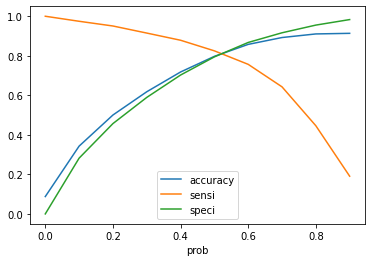

In [194]:
#We can observe 0.45-0.5 to be suitable, but our priority is on high sensitivity and accuracy. Lets try cut offs 0.45 and 5
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

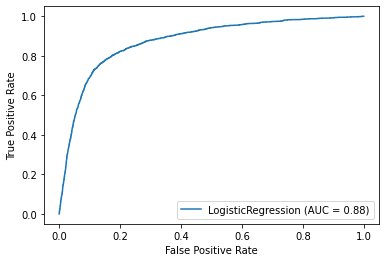

In [195]:
#plotting the roc_auc graph

plot_roc_curve(logreg2,X_train_scaled[col].drop(remove,axis=1),y_train)

Quite a decent score of 0.88.

In [196]:
#Assigning a cut off of 0.5 since 0.45 decreases senstivity

y_train_pred_final_inter['churn_logistic_inter'] = y_train_pred_final_inter.Conversion_Rate.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_inter

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn_logistic_inter
0,0,0.261882,1,1,1,0,0,0,0,0,0,0,0
1,0,0.153836,1,1,0,0,0,0,0,0,0,0,0
2,0,0.075631,1,0,0,0,0,0,0,0,0,0,0
3,1,0.633339,1,1,1,1,1,1,1,0,0,0,1
4,1,0.381521,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,0,0.041621,1,0,0,0,0,0,0,0,0,0,0
21003,0,0.880649,1,1,1,1,1,1,1,1,1,0,1
21004,0,0.272152,1,1,1,0,0,0,0,0,0,0,0
21005,0,0.199310,1,1,0,0,0,0,0,0,0,0,0


In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred_final_inter['Converted'],y_train_pred_final_inter['churn_logistic_inter'])

0.7971152472985196

In [198]:
#Lets predict the test data

y_test_pred = logreg2.predict_proba(X_test_scaled[col].drop(remove,axis=1))
y_test_pred = y_test_pred[:,1]
y_test_pred.reshape(1,-1)

y_test_pred_final_inter = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final_inter

,Converted,Conversion_Rate
0,0,0.178411
1,0,0.005145
2,1,0.750107
3,0,0.373618
4,0,0.253567
...,...,...
8999,0,0.734423
9000,0,0.555763
9001,0,0.605494
9002,0,0.155388


In [199]:
#Assigning 0.5 as the cutoff in test data

y_test_pred_final_inter['churn_logistic_inter'] = y_test_pred_final_inter.Conversion_Rate.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final_inter

,Converted,Conversion_Rate,churn_logistic_inter
0,0,0.178411,0
1,0,0.005145,0
2,1,0.750107,1
3,0,0.373618,0
4,0,0.253567,0
...,...,...,...
8999,0,0.734423,1
9000,0,0.555763,1
9001,0,0.605494,1
9002,0,0.155388,0


In [200]:
#Creating the confusion matrix

cm_test_inter = confusion_matrix(y_test_pred_final_inter['Converted'], y_test_pred_final_inter['churn_logistic_inter'])
TP_inter = cm_test_inter[1,1] # true positive 
TN_inter = cm_test_inter[0,0] # true negatives
FP_inter = cm_test_inter[0,1] # false positives
FN_inter = cm_test_inter[1,0] # false negatives

In [201]:
#accuracy
accuracy_logistic_interpretable = accuracy_score(y_test_pred_final_inter['Converted'],y_test_pred_final_inter['churn_logistic_inter'])

#sensitivity
sensitivity_logistic_interpretable = TP_inter/(TP_inter+FN_inter)

#specificity
specificity_logistic_interpretable = TN_inter/(TN_inter+FP_inter)

#precision
precision_logistic_interpretable = TP_inter/(TP_inter+FP_inter)

#f1_score
f1_logistic_interpretable = 2* ((sensitivity_logistic_interpretable*precision_logistic_interpretable) / (sensitivity_logistic_interpretable + precision_logistic_interpretable))

In [202]:
#Adding the final result to the DataFrame
final_result_dict = {'Model':['Logistic Regression_interpretable'],
                     'Accuracy':[accuracy_logistic_interpretable],
                     'Sensitivity':[sensitivity_logistic_interpretable],
                     'Specificity':[specificity_logistic_interpretable],
                     'Precision':[precision_logistic_interpretable],
                     'F1_score': [f1_logistic_interpretable]}

final_df = pd.DataFrame(final_result_dict)
final_df

,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,Logistic Regression_interpretable,0.801866,0.808824,0.801235,0.269368,0.404142


#Observation and Business Insights from the interpretable model



The variables that significantly affected the churn rates were detected to be-
-std_of_mou_8
-arpu_6
-arpu_7
-arpu_8
-spl_ic_mou_8
-monthly 2g_8
-month_3g_8
-days_before_last_recharge_8

Business insights-
1. Mostly the 3rd month variables are critical.
2. The number of recharges made by the customer will not ensure if he/she will stay in the network
3. Offers are needed to be provided to customers so that they keep recharging the same scheme. If a drop is observed, perhaps priority needs to be given
4. The average revenue of the first two months are important. Any deviation from the logarithmic range of 7-7.6 is a sign of some churning. The lower the bad
5. Customers who are on the network for less than 500 days, good promotions need to be targetted to them.
6. Long term plans should be marketed to these customers to retain them for a longer period.

# Model with high preditive power

## Reducing Dimensions using PCA


In [203]:
#Using power transformer to scale the dataframe as it will make the calculation of principal components faster

scaler = PowerTransformer()
x = scaler.fit_transform(X_train)

In [204]:
#Fitting PCA object to the dataframe

pca = PCA(random_state=0)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 99 artists>

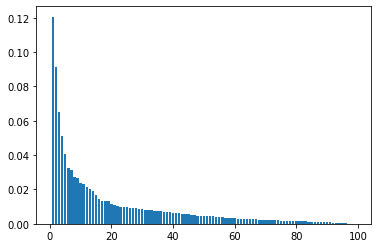

In [205]:
#Lets check the number of components explaining the varianc
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

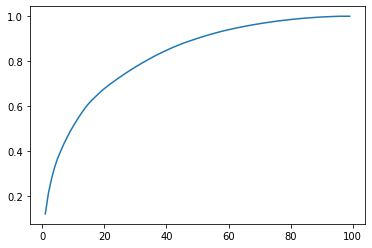

In [206]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

We can take 65 components which explain about 90-95% of variance

In [207]:
#Creating a new dataframe of 65 principal components

pc2 = PCA(n_components=65, random_state=42)
newdata = pc2.fit_transform(x)

list_pc = []
for i in range(1,66):
  list_pc.append('PC_'+ str(i)) 
pca_df = df = pd.DataFrame(newdata , columns=list_pc)
pca_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65
0,-5.511516,-1.296826,0.750055,-1.654244,1.151978,-0.834144,-2.266278,-0.025982,0.669013,-0.621125,0.163977,0.580756,0.461306,-0.531357,-0.154456,-1.611494,0.515931,-1.538909,-0.040729,-1.675375,0.986975,1.010748,-0.626245,0.523336,0.124531,-1.528998,-0.017535,0.026801,1.369045,-0.101434,-0.528596,-0.250797,0.577457,-0.299502,-0.459160,0.534605,0.633777,0.288091,0.039322,-0.986836,0.087934,0.186258,0.601080,0.039262,-0.069516,-0.223320,-0.167976,0.149848,0.007258,-0.209190,0.543646,-0.087808,-0.036363,0.229639,-0.330516,-0.209473,0.360337,0.030136,0.278157,0.726439,-0.301409,0.225823,0.255327,-0.537027,0.643268
1,-0.416027,2.661212,-0.786746,-0.895821,0.357703,0.916289,-1.828779,0.835362,0.106508,0.565690,1.194353,0.054172,-0.140129,0.730852,1.533688,0.888691,0.104981,-0.111911,0.569550,0.657990,0.996621,0.554134,1.065335,0.377967,-0.598330,-0.460062,0.358116,-0.417114,-0.922782,-0.334279,0.290353,-1.329685,0.659100,-1.260926,0.109146,0.878296,0.306305,0.206784,0.482552,1.191907,-0.330636,-0.091109,0.192793,-0.362841,0.115715,-0.247138,-0.649875,-1.127881,0.018465,-0.094229,-0.079193,-0.141758,-0.039379,0.066963,-0.674688,0.398097,0.032441,-0.530068,0.370350,-0.123377,-0.211775,1.240772,0.335250,0.158683,0.175110
2,3.670204,-2.482395,3.925067,4.875416,0.713577,2.085434,-0.677648,-0.181548,1.441793,-0.101157,1.190257,-0.251203,1.001682,-0.789599,1.239525,-2.088573,0.177934,0.236911,-0.678824,0.591093,0.045229,-1.191207,0.234273,-1.018200,0.308254,0.486637,1.359061,-1.509653,0.943143,-0.531719,-1.051584,-0.304934,1.029903,-0.020981,0.088462,-1.303373,-0.351626,-1.061847,0.267763,-0.629471,-0.234981,0.720658,-0.909042,0.093806,2.598344,1.914527,-0.558204,0.216108,-0.349407,-0.295140,0.108588,-0.066831,1.810736,0.282062,-0.048392,0.404712,-0.270137,0.137245,1.050054,-0.077835,-0.471108,0.586388,-0.239483,-0.752811,-0.084148
3,-5.119031,-2.270629,-0.661676,2.177522,1.277671,2.962250,1.247891,1.033355,-0.735210,-0.664883,-1.367727,0.034465,-0.034980,0.244465,-1.328775,0.514681,0.162359,-0.835259,1.364830,0.957705,-0.816603,0.060894,0.121344,2.044267,0.066639,0.669266,-0.904017,0.726761,-0.392601,0.569796,0.340897,0.518013,0.972098,-0.797622,-1.834981,0.210098,-0.946140,0.232520,0.104227,0.015109,-0.221065,0.375339,0.965317,0.552858,-0.016936,-0.079385,0.087236,0.111732,0.099972,0.206589,0.009061,-0.178065,0.285518,-0.449230,0.086281,0.550903,-0.434284,0.035448,-0.397936,-0.093332,0.441187,-0.389479,-0.541845,-0.526687,-0.094309
4,-6.254560,-4.460494,-1.307433,1.708972,0.484184,1.350937,1.089634,-2.132368,2.963644,2.116126,1.804356,-1.507831,-0.119958,-1.481552,-1.424792,-0.557523,0.450232,-1.153483,-0.190715,0.047192,0.139106,-0.290786,-0.161481,0.677533,-0.025506,-0.148049,-0.226110,0.369547,-0.544675,-0.354551,-0.103791,0.295940,0.562588,-0.406239,0.776384,-0.337231,-0.298045,0.007774,0.124764,-0.335362,0.330398,-0.138331,-0.754001,-0.181206,0.060081,0.157217,0.631327,0.022366,0.115466,-0.223387,0.145810,0.066978,0.219011,-0.045475,0.439329,-0.187271,0.077709,-0.203263,-0.429368,0.328496,0.258506,0.108296,-0.625197,-0.170318,0.407984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,7.380154,-2.426727,-1.805314,0.429465,0.201169,-3.356247,-1.152431,0.130363,-1.324541,-1.560257,-0.720766,0.766440,-0.758503,-3.061115,0.427404,-0.022434,-0.603874,-1.457987,-1.420385,-1.054753,-0.553789,1.386893,-2.323207,-0.123710,0.646275,-0.149747,1.315034,-

## Logistic Regression

In [208]:
#Lets fit the sklearn's logistic regression package

lr_pca = LogisticRegression(class_weight='balanced')
lr_pca.fit(pca_df,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
#Predicting the X_train data as y_train pred

y_train_pred = lr_pca.predict_proba(pca_df)
y_train_pred = y_train_pred[:,1]
y_train_pred.reshape(1,-1)

#Creating a dataframe for the predictions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Rate
0,0,0.084659
1,0,0.021390
2,0,0.003246
3,1,0.858903
4,1,0.810352


In [210]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084659,1,0,0,0,0,0,0,0,0,0
1,0,0.021390,1,0,0,0,0,0,0,0,0,0
2,0,0.003246,1,0,0,0,0,0,0,0,0,0
3,1,0.858903,1,1,1,1,1,1,1,1,1,0
4,1,0.810352,1,1,1,1,1,1,1,1,1,0


In [211]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087828  1.000000  0.000000
0.1   0.1  0.561003  0.981030  0.520562
0.2   0.2  0.717761  0.954472  0.694969
0.3   0.3  0.796496  0.928997  0.783739
0.4   0.4  0.840720  0.898645  0.835142
0.5   0.5  0.870900  0.863957  0.871569
0.6   0.6  0.893940  0.821680  0.900898
0.7   0.7  0.913077  0.765312  0.927304
0.8   0.8  0.926977  0.693767  0.949431
0.9   0.9  0.935022  0.531707  0.973855


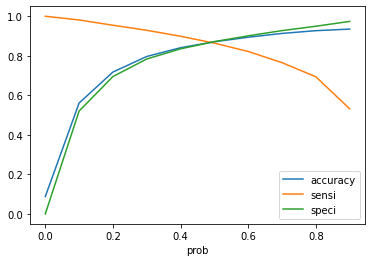

In [212]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [213]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Checking the ROC Curve and the AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

    
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Rate, drop_intermediate = False )

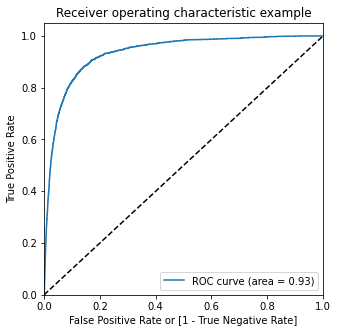

In [214]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Rate)

In [215]:
y_train_pred_final['churn_logistic'] = y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn_logistic
0,0,0.084659,1,0,0,0,0,0,0,0,0,0,0
1,0,0.021390,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003246,1,0,0,0,0,0,0,0,0,0,0
3,1,0.858903,1,1,1,1,1,1,1,1,1,0,1
4,1,0.810352,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,0,0.050936,1,0,0,0,0,0,0,0,0,0,0
21003,0,0.955305,1,1,1,1,1,1,1,1,1,1,1
21004,0,0.044886,1,0,0,0,0,0,0,0,0,0,0
21005,0,0.069159,1,0,0,0,0,0,0,0,0,0,0


In [216]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['churn_logistic'])

0.8563336030846861

In [217]:
cm_train = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['churn_logistic'])
TP = cm_train[1,1] # true positive 
TN = cm_train[0,0] # true negatives
FP = cm_train[0,1] # false positives
FN = cm_train[1,0] # false negatives

In [218]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.56371615, -0.47966607, -0.86041926, ..., -1.42511084,
        -1.56476251,  0.61051333],
       [-0.18939464,  0.09842657,  0.88442409, ..., -0.59007556,
         0.5816767 ,  0.61051333],
       [-0.63396766, -0.36289322, -0.76452121, ...,  1.96588335,
        -0.81011248,  0.61051333],
       ...,
       [-0.59002629, -0.47377223, -0.29967179, ...,  0.64201114,
        -0.48675692,  0.61051333],
       [-0.6730408 , -0.26017102,  0.60627134, ..., -1.42511084,
        -0.59915608,  0.61051333],
       [-0.70834981, -0.20929913,  0.05323064, ...,  0.44496857,
        -0.52937722, -0.14424254]])

In [219]:
pca_test_df = pd.DataFrame(pc2.transform(X_test_scaled),columns=list_pc)
pca_test_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65
0,0.297497,2.256067,-2.875751,-1.454077,-0.574888,0.449297,0.017703,0.999268,0.011904,-0.488532,0.162221,1.218698,-0.901542,0.030855,1.834374,-0.691271,0.269841,0.036835,0.715813,-0.207041,0.055024,-0.053404,0.062169,-0.556012,0.521394,0.078537,0.044165,-0.169090,-0.483549,-1.311539,0.057884,0.016673,-0.050147,1.024651,0.838942,0.012887,0.087982,-1.851371,0.350602,0.249839,-0.360086,-0.037994,0.630869,-0.056020,0.105324,0.068380,-0.188258,-0.169367,-0.119167,-0.932172,0.778150,-0.383347,0.013462,0.503431,-0.234183,-0.073246,0.049577,0.672079,-0.319956,-2.332911,0.949889,0.297461,0.156343,0.449367,0.493166
1,2.369237,6.513163,-0.962088,0.278397,-0.939381,1.002089,0.558266,-1.701600,-0.258046,1.410375,-1.241051,-1.955756,2.667258,-0.035836,0.515940,0.529707,0.511536,-0.146194,1.168404,-0.344142,1.264843,-0.270038,0.039620,-1.424320,-1.173037,-1.493773,1.541514,-0.206909,0.194293,1.471612,0.938522,0.703438,0.458926,-0.228734,1.174638,0.392705,-1.829486,0.736757,0.422098,-1.277814,-0.211889,0.251762,0.650831,0.097398,-0.493545,0.428797,0.256121,0.051911,0.000051,0.033030,0.464475,-0.195805,0.150771,0.460277,0.122494,0.189616,-0.090543,0.226431,0.175006,-0.210080,0.705616,-0.232937,-0.393209,-0.265069,-0.311700
2,-4.271858,-6.174988,-3.539187,4.314159,0.027600,0.773633,2.066994,-0.760480,1.172755,-0.223140,1.435390,-0.968468,-1.108653,0.777018,-0.736046,-2.815155,0.829553,0.505467,-0.122924,1.526687,0.625037,0.031283,1.787460,2.013884,-1.139797,0.579906,-1.500512,0.962641,-1.119642,0.099684,-1.040599,1.285568,0.137659,-0.887037,-0.710152,0.061142,-1.122085,-0.215073,-0.192290,-0.188206,-1.478792,-0.145662,-0.892674,-0.319049,0.865446,1.519024,-0.088775,0.713732,-1.030129,-0.038618,-0.034513,1.306983,0.321342,0.946461,0.758449,-1.494180,0.667037,0.515445,0.601114,-1.263452,-0.142538,0.121798,-0.890945,-0.074911,-0.537520
3,0.922619,-3.159657,5.509528,-3.439617,0.142665,-0.965880,0.148366,-1.450424,-0.601333,0.271804,-1.409781,1.225248,-0.869226,-0.016045,2.271463,1.120392,0.056098,-1.509514,-1.338882,0.026633,0.302826,-0.943876,2.548826,0.532745,-0.216441,0.864891,0.029924,-0.953256,0.520833,-0.468577,0.036106,-0.799515,-0.622813,-1.749177,-0.121584,-0.074714,0.412316,-0.941569,0.638383,-0.711044,-0.058233,-0.225202,0.294832,-0.570606,-0.351524,1.365837,-0.879648,0.118066,-0.781639,-0.272544,0.501130,-0.258031,-0.076245,-2.322378,0.021636,0.564377,1.293082,0.063002,0.196811,-0.929201,0.208832,0.145221,-0.476137,0.064099,-0.231763
4,-4.562457,-1.295054,1.024226,-0.276068,-0.203637,1.088377,-0.323770,-1.463707,-2.493269,0.810516,-0.252037,0.230116,-1.769336,-2.210564,0.853092,-0.805983,-0.780110,0.975709,-1.436697,0.932865,-0.188788,-0.596688,1.001312,-0.476825,1.077174,0.473728,-1.101925,1.148374,-0.194066,-0.376964,1.683823,-0.584225,0.661849,0.112805,1.004794,-0.253138,-0.041118,0.214419,-0.200085,0.794739,-0.402036,-0.003255,-0.339860,-0.371096,-0.042577,-0.039332,0.002074,0.118307,-1.599581,-0.565123,0.415494,0.069413,-0.149723,0.747079,0.377326,0.704342,0.190473,-0.087495,-0.243592,0.404215,-0.194661,-0.641497,-0.077847,0.312795,-0.199557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999,1.078210,-8.131942,0.165241,-3.269919,-0.433096,-0.316875,-0.366395,1.620739,-0.767253,3.056347,-0.833054,0.316502,-0.642015,1.554974,1.180522,2.035471,4.349073,0.657486,-0.812783,0.611522,0.741344,-0.565412,-0.967570,0.951286,-0.770005,-3.178674,-0.141311

In [220]:
y_test_pred = lr_pca.predict_proba(pca_test_df)
y_test_pred = y_test_pred[:,1]
y_test_pred.reshape(1,-1)

array([[0.02151014, 0.00575885, 0.86802178, ..., 0.31634601, 0.17984108,
        0.00525562]])

In [221]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Rate
0,0,0.021510
1,0,0.005759
2,1,0.868022
3,0,0.085000
4,0,0.275026


In [222]:
y_test_pred_final['churn_logistic'] = y_test_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final

,Converted,Conversion_Rate,churn_logistic
0,0,0.021510,0
1,0,0.005759,0
2,1,0.868022,1
3,0,0.085000,0
4,0,0.275026,0
...,...,...,...
8999,0,0.637066,1
9000,0,0.791742,1
9001,0,0.316346,0
9002,0,0.179841,0


In [223]:
cm_test = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['churn_logistic'])
TP = cm_test[1,1] # true positive 
TN = cm_test[0,0] # true negatives
FP = cm_test[0,1] # false positives
FN = cm_test[1,0] # false negatives

In [224]:
#accuracy
accuracy_logistic = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['churn_logistic'])

#sensitivity
sensitivity_logistic = TP/(TP+FN)

#specificity
specificity_logistic = TN/(TN+FP)

#precision
precision_logistic = TP/(TP+FP)

#f1_score
f1_logistic = 2* ((sensitivity_logistic*precision_logistic) / (sensitivity_logistic + precision_logistic))

In [225]:
final_result_dict = {'Model':['Logistic Regression_interpretable','Logistic Regression'],
                     'Accuracy':[accuracy_logistic_interpretable,accuracy_logistic],
                     'Sensitivity':[sensitivity_logistic_interpretable,sensitivity_logistic],
                     'Specificity':[specificity_logistic_interpretable,specificity_logistic],
                     'Precision':[precision_logistic_interpretable,precision_logistic],
                     'F1_score': [f1_logistic_interpretable,f1_logistic]}

final_df = pd.DataFrame(final_result_dict)
final_df

,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,Logistic Regression_interpretable,0.801866,0.808824,0.801235,0.269368,0.404142
1,Logistic Regression,0.854398,0.868984,0.853077,0.348900,0.497894


## Decision Tree Classifier

In [226]:
#Lets check for the right parameters using grid searchcv and fit the best model with high roc_auc score
#This cell is muted to save time since the best estimators have already been obtained

# params = {'max_depth': [2,3,4,5,7,8,9],'min_samples_split':[700,750,800,850,900]}
# dc = DecisionTreeClassifier(class_weight='balanced',random_state=0)
# folds = 5
# model_cv_dt = GridSearchCV(estimator = dc, 
#                         param_grid = params, 
#                         scoring= 'roc_auc', 
#                         cv = folds,
#                         n_jobs=-1, 
#                         return_train_score=True,
#                         verbose = 1)            
# model_cv_dt.fit(pca_df, y_train)

In [227]:
# model_cv_dt.best_estimator_

In [228]:
#Fitting the best model obtained from gridsearch

model_cv_dt = DecisionTreeClassifier(class_weight='balanced',random_state=0,max_depth=7,min_samples_split=800)
model_cv_dt.fit(pca_df, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=800,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

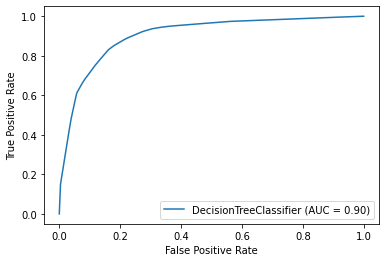

In [229]:
plot_roc_curve(model_cv_dt,pca_df,y_train)

In [230]:
#Predicting the train values and creating the prediction dataframe

y_train_pred = model_cv_dt.predict_proba(pca_df)
y_train_pred = y_train_pred[:,1]
y_train_pred.reshape(1,-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final

,Converted,Conversion_Rate
0,0,0.053954
1,0,0.116752
2,0,0.056897
3,1,0.905558
4,1,0.905558
...,...,...
21002,0,0.056897
21003,0,0.905558
21004,0,0.056897
21005,0,0.674698


In [231]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.053954,1,0,0,0,0,0,0,0,0,0
1,0,0.116752,1,1,0,0,0,0,0,0,0,0
2,0,0.056897,1,0,0,0,0,0,0,0,0,0
3,1,0.905558,1,1,1,1,1,1,1,1,1,1
4,1,0.905558,1,1,1,1,1,1,1,1,1,1


In [232]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.089446  1.000000  0.001774
0.1   0.1  0.484791  0.973984  0.437689
0.2   0.2  0.688961  0.944715  0.664336
0.3   0.3  0.716095  0.936585  0.694865
0.4   0.4  0.784548  0.891057  0.774293
0.5   0.5  0.822821  0.851491  0.820061
0.6   0.6  0.837673  0.830894  0.838326
0.7   0.7  0.896225  0.679133  0.917128
0.8   0.8  0.913505  0.611382  0.942595
0.9   0.9  0.918979  0.480759  0.961173


In [233]:
#Predicting test data and creating dataframe.Then we tag churners with the cutoff of 0.5
y_test_pred = model_cv_dt.predict_proba(pca_test_df)
y_test_pred = y_test_pred[:,1]
y_test_pred.reshape(1,-1)

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final['churn_DecisionTree'] = y_test_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final

,Converted,Conversion_Rate,churn_DecisionTree
0,0,0.056897,0
1,0,0.106491,0
2,1,0.707486,1
3,0,0.106491,0
4,0,0.053954,0
...,...,...,...
8999,0,0.534883,1
9000,0,0.905558,1
9001,0,0.150891,0
9002,0,0.106491,0


In [234]:
cm_test_dt = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['churn_DecisionTree'])
TP_dt = cm_test_dt[1,1] # true positive 
TN_dt = cm_test_dt[0,0] # true negatives
FP_dt = cm_test_dt[0,1] # false positives
FN_dt = cm_test_dt[1,0] # false negatives

#accuracy
accuracy_DecisionTree = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['churn_DecisionTree'])

#sensitivity
sensitivity_DecisionTree = TP_dt/(TP_dt+FN_dt)

#specificity
specificity_DecisionTree = TN_dt/(TN_dt+FP_dt)

#precision
precision_DecisionTree = TP_dt/(TP_dt+FP_dt)

#f1_score
f1_DecisionTree = 2* ((sensitivity_DecisionTree*precision_DecisionTree) / (sensitivity_DecisionTree + precision_DecisionTree))

final_result_dict =  {'Model':['Logistic Regression_interpretable','Logistic Regression','Decision Tree'],
                     'Accuracy':[accuracy_logistic_interpretable,accuracy_logistic,accuracy_DecisionTree],
                     'Sensitivity':[sensitivity_logistic_interpretable,sensitivity_logistic,sensitivity_DecisionTree],
                     'Specificity':[specificity_logistic_interpretable,specificity_logistic,specificity_DecisionTree],
                     'Precision':[precision_logistic_interpretable,precision_logistic,precision_DecisionTree],
                     'F1_score': [f1_logistic_interpretable,f1_logistic,f1_DecisionTree]}

final_df = pd.DataFrame(final_result_dict)
final_df

,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,Logistic Regression_interpretable,0.801866,0.808824,0.801235,0.269368,0.404142
1,Logistic Regression,0.854398,0.868984,0.853077,0.348900,0.497894
2,Decision Tree,0.811639,0.812834,0.811531,0.280961,0.417582


## Random Forest Classifier

In [235]:
# Now running the grid search on random forest to find the best hyperparameters
# This cell is muted. The best hyperparameters are already estimated and are applied in the below cell. This is being done to save time

# rf = RandomForestClassifier(class_weight='balanced',random_state=0,oob_score=True)

# params = {'max_depth': [3,5,7,10],
#           'min_samples_split':[10,50,100],
#           'n_estimators':[200,400,600]}
# folds = 5
# model_cv_rf = GridSearchCV(estimator = rf, 
#                         param_grid = params, 
#                         scoring= 'roc_auc', 
#                         cv = folds,
#                         n_jobs=-1, 
#                         return_train_score=True,
#                         verbose = 1)            
# model_cv_rf.fit(pca_df, y_train)

In [417]:
#Fitting the best model obtained from above

model_cv_rf = RandomForestClassifier(class_weight='balanced',random_state=0,oob_score=True,max_depth=5,min_samples_split=10,n_estimators=100,n_jobs=-1)
model_cv_rf.fit(pca_df,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

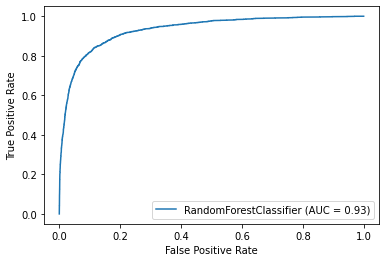

In [418]:
#Plotting the roc_auc graph
plot_roc_curve(model_cv_rf,pca_df,y_train)

0.95 shows this as an excellent classifier


In [419]:
#Lets predict the train data and create a dataframe of train prediction
y_train_pred = model_cv_rf.predict_proba(pca_df)
y_train_pred = y_train_pred[:,1]
y_train_pred.reshape(1,-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final

,Converted,Conversion_Rate
0,0,0.345000
1,0,0.237773
2,0,0.247582
3,1,0.552728
4,1,0.587465
...,...,...
21002,0,0.278900
21003,0,0.802688
21004,0,0.179858
21005,0,0.331008


In [420]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.345000,1,1,1,1,0,0,0,0,0,0
1,0,0.237773,1,1,1,0,0,0,0,0,0,0
2,0,0.247582,1,1,1,0,0,0,0,0,0,0
3,1,0.552728,1,1,1,1,1,1,0,0,0,0
4,1,0.587465,1,1,1,1,1,1,0,0,0,0


In [421]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087828  1.000000  0.000000
0.1   0.1  0.087828  1.000000  0.000000
0.2   0.2  0.157376  0.998374  0.076401
0.3   0.3  0.560575  0.971816  0.520979
0.4   0.4  0.815062  0.900271  0.806857
0.5   0.5  0.899081  0.807046  0.907943
0.6   0.6  0.935212  0.665041  0.961225
0.7   0.7  0.936831  0.420054  0.986588
0.8   0.8  0.930023  0.233062  0.997130
0.9   0.9  0.918361  0.076965  0.999374


0.43 cutoff seems to be reasonable

In [428]:
#Lets predict the test data and make the dataframe of test predictions
y_test_pred = model_cv_rf.predict_proba(pca_test_df)
y_test_pred = y_test_pred[:,1]
y_test_pred.reshape(1,-1)

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final['churn_RandomForest'] = y_test_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.43 else 0)
y_test_pred_final

,Converted,Conversion_Rate,churn_RandomForest
0,0,0.181735,0
1,0,0.188003,0
2,1,0.614702,1
3,0,0.330567,0
4,0,0.375114,0
...,...,...,...
8999,0,0.397450,0
9000,0,0.732978,1
9001,0,0.300851,0
9002,0,0.395021,0


In [429]:
#Finally we calculate the confusion matrix and other metrics and write them to a dataframe final_result_dict

cm_test_rf = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['churn_RandomForest'])
TP_rf = cm_test_rf[1,1] # true positive 
TN_rf = cm_test_rf[0,0] # true negatives
FP_rf = cm_test_rf[0,1] # false positives
FN_rf = cm_test_rf[1,0] # false negatives

#accuracy
accuracy_RandomForest = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['churn_RandomForest'])

#sensitivity
sensitivity_RandomForest = TP_rf/(TP_rf+FN_rf)

#specificity
specificity_RandomForest = TN_rf/(TN_rf+FP_rf)

#precision
precision_RandomForest = TP_rf/(TP_rf+FP_rf)

#f1_score
f1_RandomForest = 2* ((sensitivity_RandomForest*precision_RandomForest) / (sensitivity_RandomForest + precision_RandomForest))

final_result_dict =  {'Model':['Logistic Regression_interpretable','Logistic Regression','Decision Tree','Random Forest'],
                     'Accuracy':[accuracy_logistic_interpretable,accuracy_logistic,accuracy_DecisionTree,accuracy_RandomForest],
                     'Sensitivity':[sensitivity_logistic_interpretable,sensitivity_logistic,sensitivity_DecisionTree,sensitivity_RandomForest],
                     'Specificity':[specificity_logistic_interpretable,specificity_logistic,specificity_DecisionTree,specificity_RandomForest],
                     'Precision':[precision_logistic_interpretable,precision_logistic,precision_DecisionTree,precision_RandomForest],
                     'F1_score': [f1_logistic_interpretable,f1_logistic,f1_DecisionTree,f1_RandomForest]}

final_df = pd.DataFrame(final_result_dict)
final_df

,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,Logistic Regression_interpretable,0.801866,0.808824,0.801235,0.269368,0.404142
1,Logistic Regression,0.854398,0.868984,0.853077,0.348900,0.497894
2,Decision Tree,0.811639,0.812834,0.811531,0.280961,0.417582
3,Random Forest,0.842514,0.840909,0.842660,0.326245,0.470105


## XG Boost

In [257]:
#This cell is muted to save time. The best hyperparameters have been estimated and are applied in the below code cell.Giving scale_pos_weight as 10.5 (number of not_churn/number of churn)

# xgb_params_ = {'n_estimators':[100,150,200,300], 
#                'max_depth':[3,4,5,6,8],
#                'learning_rate':[0.01,0.03,0.05,0.1,0.15]}
# folds = 5
# model_cv_xg = GridSearchCV(estimator = xgb.XGBClassifier(scale_pos_weight=10.5),
#                         param_grid = xgb_params_, 
#                         scoring = 'roc_auc', 
#                         cv = folds,
#                         n_jobs=-1, 
#                         return_train_score=True,
#                         verbose = 1)            
# model_cv_xg.fit(pca_df, y_train)

In [441]:
model_cv_xg = xgb.XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.03,n_jobs=-1,scale_pos_weight=10.5)
model_cv_xg.fit(pca_df,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.5, seed=None,
              silent=None, subsample=1, verbosity=1)

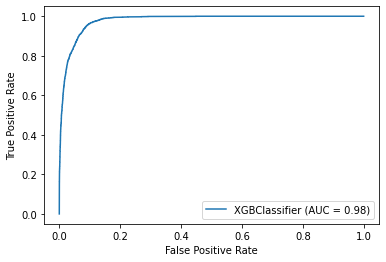

In [442]:
#Plotting the roc_auc
plot_roc_curve(model_cv_xg,pca_df,y_train)

In [443]:
#Prediction Train data and creating dataframe of train predictions
y_train_pred = model_cv_xg.predict_proba(pca_df)
y_train_pred = y_train_pred[:,1]
y_train_pred.reshape(1,-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final

,Converted,Conversion_Rate
0,0,0.070342
1,0,0.049686
2,0,0.047936
3,1,0.860322
4,1,0.855389
...,...,...
21002,0,0.058099
21003,0,0.923425
21004,0,0.035838
21005,0,0.078190


In [444]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070342,1,0,0,0,0,0,0,0,0,0
1,0,0.049686,1,0,0,0,0,0,0,0,0,0
2,0,0.047936,1,0,0,0,0,0,0,0,0,0
3,1,0.860322,1,1,1,1,1,1,1,1,1,0
4,1,0.855389,1,1,1,1,1,1,1,1,1,0


In [445]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087828  1.000000  0.000000
0.1   0.1  0.611844  0.999458  0.574522
0.2   0.2  0.802018  0.995664  0.783373
0.3   0.3  0.865569  0.988618  0.853721
0.4   0.4  0.899510  0.967480  0.892965
0.5   0.5  0.919360  0.937669  0.917597
0.6   0.6  0.933736  0.896477  0.937324
0.7   0.7  0.944733  0.832520  0.955537
0.8   0.8  0.954920  0.755556  0.974115
0.9   0.9  0.950017  0.508943  0.992485


Taking 0.35 as cutoff

In [448]:
#Prediction Train data and creating dataframe of train predictions
y_test_pred = model_cv_xg.predict_proba(pca_test_df)
y_test_pred = y_test_pred[:,1]
y_test_pred.reshape(1,-1)

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final['churn_XGBoost'] = y_test_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final

,Converted,Conversion_Rate,churn_XGBoost
0,0,0.031449,0
1,0,0.031609,0
2,1,0.849671,1
3,0,0.176804,0
4,0,0.051413,0
...,...,...,...
8999,0,0.525718,1
9000,0,0.840107,1
9001,0,0.184276,0
9002,0,0.156982,0


In [449]:
#Finally calculating the confusion matrix and writing all the metrics obtained in a dataframe

cm_test_xg = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['churn_XGBoost'])
TP_xg = cm_test_xg[1,1] # true positive 
TN_xg = cm_test_xg[0,0] # true negatives
FP_xg = cm_test_xg[0,1] # false positives
FN_xg = cm_test_xg[1,0] # false negatives

#accuracy
accuracy_XGBoost = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['churn_XGBoost'])

#sensitivity
sensitivity_XGBoost = TP_xg/(TP_xg+FN_xg)

#specificity
specificity_XGBoost = TN_xg/(TN_xg+FP_xg)

#precision
precision_XGBoost = TP_xg/(TP_xg+FP_xg)

#f1_score
f1_XGBoost = 2* ((sensitivity_XGBoost*precision_XGBoost) / (sensitivity_XGBoost + precision_XGBoost))

final_result_dict =  {'Model':['Logistic Regression_interpretable','Logistic Regression','Decision Tree','Random Forest','XGBoost'],
                     'Accuracy':[accuracy_logistic_interpretable,accuracy_logistic,accuracy_DecisionTree,accuracy_RandomForest,accuracy_XGBoost],
                     'Sensitivity':[sensitivity_logistic_interpretable,sensitivity_logistic,sensitivity_DecisionTree,sensitivity_RandomForest,sensitivity_XGBoost],
                     'Specificity':[specificity_logistic_interpretable,specificity_logistic,specificity_DecisionTree,specificity_RandomForest,specificity_XGBoost],
                     'Precision':[precision_logistic_interpretable,precision_logistic,precision_DecisionTree,precision_RandomForest,precision_XGBoost],
                     'F1_score': [f1_logistic_interpretable,f1_logistic,f1_DecisionTree,f1_RandomForest,f1_XGBoost]}


final_df = pd.DataFrame(final_result_dict)
final_df

,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,Logistic Regression_interpretable,0.801866,0.808824,0.801235,0.269368,0.404142
1,Logistic Regression,0.854398,0.868984,0.853077,0.348900,0.497894
2,Decision Tree,0.811639,0.812834,0.811531,0.280961,0.417582
3,Random Forest,0.842514,0.840909,0.842660,0.326245,0.470105
4,XGBoost,0.864394,0.846257,0.866037,0.364002,0.509047


We see XGBoost to be performing desirably